**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("DESeq2")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_CombEffect_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_CombEffect_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_CombEffect_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_CombEffect_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_CombEffect_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_CombEffect_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_CombEffect_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_CombEffect_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_CombEffect_ENCODE_FCC/references 



## Import count matrix and metadata

In [2]:
### init
TXT_ASSAY  = "STARR_ATAC_K562_Reddy_KS91"

In [3]:
### set directory
txt_fdiry = file.path(FD_RES, "assay_fcc", TXT_ASSAY, "fragment_counts", "summary")
txt_fname = "metadata.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_metadata_astarr = dat
fun_display_table(dat)

FName,Assay,Prefix,Group,Sample
ASTARRseq_K562_KS91.hg38.Input.rep1.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep1
ASTARRseq_K562_KS91.hg38.Input.rep2.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep2
ASTARRseq_K562_KS91.hg38.Input.rep3.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep3
ASTARRseq_K562_KS91.hg38.Input.rep4.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep4
ASTARRseq_K562_KS91.hg38.Input.rep5.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep5
ASTARRseq_K562_KS91.hg38.Input.rep6.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Input,Input.rep6
ASTARRseq_K562_KS91.hg38.Output.rep1.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep1
ASTARRseq_K562_KS91.hg38.Output.rep2.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep2
ASTARRseq_K562_KS91.hg38.Output.rep3.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep3
ASTARRseq_K562_KS91.hg38.Output.rep4.WGS.unstranded.bed.gz,STARR_ATAC_K562_Reddy_KS91,ASTARRseq_K562_KS91,Output,Output.rep4


**import region metadata**

In [4]:
txt_fdiry = file.path(FD_RES, "region", "summary")
txt_fname = "metadata_region_label.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_metadata_region = dat
print(dim(dat))
fun_display_table(dat)

[1] 8 3


Folder,FName,Label
encode_open_chromatin,K562.hg38.ENCSR000EKS.ENCFF274YGF.DNase.bed.gz,dnase_ENCFF274YGF
encode_open_chromatin,K562.hg38.ENCSR000EOT.ENCFF185XRG.DNase.bed.gz,dnase_ENCFF185XRG
encode_open_chromatin,K562.hg38.ENCSR483RKN.ENCFF558BLC.ATAC.bed.gz,atac_ENCFF558BLC
encode_open_chromatin,K562.hg38.ENCSR483RKN.ENCFF925CYR.ATAC.bed.gz,atac_ENCFF925CYR
encode_open_chromatin,K562.hg38.ENCSR868FGK.ENCFF333TAT.ATAC.bed.gz,atac_ENCFF333TAT
encode_open_chromatin,K562.hg38.ENCSR868FGK.ENCFF948AFM.ATAC.bed.gz,atac_ENCFF948AFM
fcc_astarr_macs,ASTARRseq_K562_KS91.hg38.Input.rep_all.max_overlaps.q5.bed,astarr_macs_input_overlap
fcc_astarr_macs,ASTARRseq_K562_KS91.hg38.Input.rep_all.union.q5.bed,astarr_macs_input_union


In [6]:
dat = dat_metadata_region
lst = split(dat$Label, dat$Folder)

lst_metadata_region = lst
print(lst)

$encode_open_chromatin
[1] "dnase_ENCFF274YGF" "dnase_ENCFF185XRG" "atac_ENCFF558BLC" 
[4] "atac_ENCFF925CYR"  "atac_ENCFF333TAT"  "atac_ENCFF948AFM" 

$fcc_astarr_macs
[1] "astarr_macs_input_overlap" "astarr_macs_input_union"  



In [5]:
txt_folder = "fcc_astarr_macs"
txt_label  = "astarr_macs_input_union"

In [7]:
###
cat("====================", "\n")
cat("Region Folder:", txt_folder, "\n")
cat("Region Label: ", txt_label,  "\n")

###
txt_fdiry = file.path(FD_RES, "assay_fcc", TXT_ASSAY, "coverage", txt_folder, txt_label, "summary")
txt_fname = "matrix.raw.count.WGS.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
print(dim(dat))

###
fun_display_table(head(dat))

Region Folder: fcc_astarr_macs 
Region Label:  astarr_macs_input_union 
[1] 247520     11


Region,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:10015-10442,155,214,257,236,185,214,7,12,4,11
chr1:14253-14645,110,144,160,141,130,130,8,26,30,57
chr1:16015-16477,141,208,206,190,202,182,9,9,18,23
chr1:17237-17772,259,350,399,367,369,331,7,13,23,59
chr1:28903-29613,263,338,368,333,352,317,12,18,3,32
chr1:30803-31072,82,115,171,136,105,115,13,22,14,33


In [8]:
dat_meta = dat_metadata_astarr

dat_col = dat_meta  %>% 
    dplyr::select(Sample, Group) %>% 
    dplyr::rename(condition = Group) %>%
    column_to_rownames(var = "Sample")

dat_cnt = dat %>% 
    column_to_rownames(var = "Region")

In [9]:
dds = DESeqDataSetFromMatrix(
    countData = dat_cnt, 
    colData   = dat_col, 
    design    = ~condition)

### set control condition as reference
dds$condition <- relevel(dds$condition, ref = "Input")

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [10]:
### run DESeq2
dds = DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [12]:
txt_fdiry = file.path(FD_RES, "assay_fcc", TXT_ASSAY, "coverage", txt_folder, txt_label, "summary")
print(txt_fdiry)
dir(txt_fdiry)

[1] "/mount/repo/Proj_CombEffect_ENCODE_FCC/results/assay_fcc/STARR_ATAC_K562_Reddy_KS91/coverage/fcc_astarr_macs/astarr_macs_input_union/summary"


[1] "matrix.raw.count.WGS.tsv"

In [13]:
FD_OUT = file.path(FD_RES, "assay_fcc", TXT_ASSAY, "coverage", txt_folder, txt_label, "summary")

txt_fdiry = FD_OUT
print(txt_fdiry)
dir(txt_fdiry)

[1] "/mount/repo/Proj_CombEffect_ENCODE_FCC/results/assay_fcc/STARR_ATAC_K562_Reddy_KS91/coverage/fcc_astarr_macs/astarr_macs_input_union/summary"


[1] "matrix.raw.count.WGS.tsv"

In [14]:
fdiry = FD_OUT
fname = "data_list.rds"
fpath = file.path(fdiry, fname)

lst = list(
    "data_cnt" = dat_cnt,
    "data_col" = dat_col)
obj = lst

saveRDS(obj, fpath)

In [15]:
fdiry = FD_OUT
fname = "data_deseq2.rds"
fpath = file.path(fdiry, fname)

obj = dds
saveRDS(obj, fpath)

In [3]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("DESeq2")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_CombEffect_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_CombEffect_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_CombEffect_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_CombEffect_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_CombEffect_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_CombEffect_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_CombEffect_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_CombEffect_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_CombEffect_ENCODE_FCC/references 



## Import data

In [4]:
FD_RES

[1] "/mount/repo/Proj_CombEffect_ENCODE_FCC/results"

In [5]:
TXT_ASSAY  = "STARR_ATAC_K562_Reddy_KS91"
txt_folder = "fcc_astarr_macs"
txt_label  = "astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "assay_fcc", TXT_ASSAY, "coverage", txt_folder, txt_label, "summary")

fname = "data_list.rds"
fpath = file.path(txt_fdiry, fname)
obj   = readRDS(fpath)

lst_data = obj

fname = "data_deseq2.rds"
fpath = file.path(txt_fdiry, fname)
obj   = readRDS(fpath)

dds_data = obj

In [6]:
dds_res = results(dds_data)
dat_res = as.data.frame(dds_res) %>% rownames_to_column(var = "Peak")
head(dat_res)

,Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1:10015-10442,71.40375,-2.2136129,0.2691515,-8.2244111,1.961522e-16,2.910589e-15
2,chr1:14253-14645,68.63035,0.2221860,0.1534100,1.4483155,1.475288e-01,2.178109e-01
3,chr1:16015-16477,71.25409,-1.2712950,0.2019627,-6.2947016,3.079917e-10,2.652955e-09
4,chr1:17237-17772,124.03128,-1.3852890,0.1638626,-8.4539657,2.815720e-17,4.431690e-16
5,chr1:28903-29613,113.63103,-1.9422003,0.1886130,-10.2972759,7.248489e-25,1.723634e-23
6,chr1:30803-31072,57.37875,-0.1332071,0.2145690,-0.6208123,5.347231e-01,6.231381e-01


In [7]:
metadata(dds_res)$filterThreshold

0.2698772% 
0.04640265

In [8]:
dat = dat_res
vec1 = dat$pvalue
vec2 = dat$padj

vec = vec2
cat("#{Total}   =", nrow(dat), "\n")
cat("#{Removed} =", sum( is.na(vec)), "\n")
cat("%{Removed} =", mean(is.na(vec)), "\n")

vec = vec1
cat("#{Signif (<0.05) | Before removed} =", sum( vec < 0.05, na.rm = TRUE), "\n")
cat("%{Signif (<0.05) | Before removed} =", mean(vec < 0.05, na.rm = TRUE), "\n") 

vec = vec2
cat("#{Signif (<0.05) | After removed}  =", sum( vec < 0.05, na.rm = TRUE), "\n")
cat("%{Signif (<0.05) | After removed}  =", mean(vec < 0.05, na.rm = TRUE), "\n") 

#{Total}   = 247520 
#{Removed} = 668 
%{Removed} = 0.002698772 
#{Signif (<0.05) | Before removed} = 141618 
%{Signif (<0.05) | Before removed} = 0.573696 
#{Signif (<0.05) | After removed}  = 129371 
%{Signif (<0.05) | After removed}  = 0.5240833 


Warning message:
“Removed 668 rows containing non-finite outside the scale range
(`stat_bin()`).”


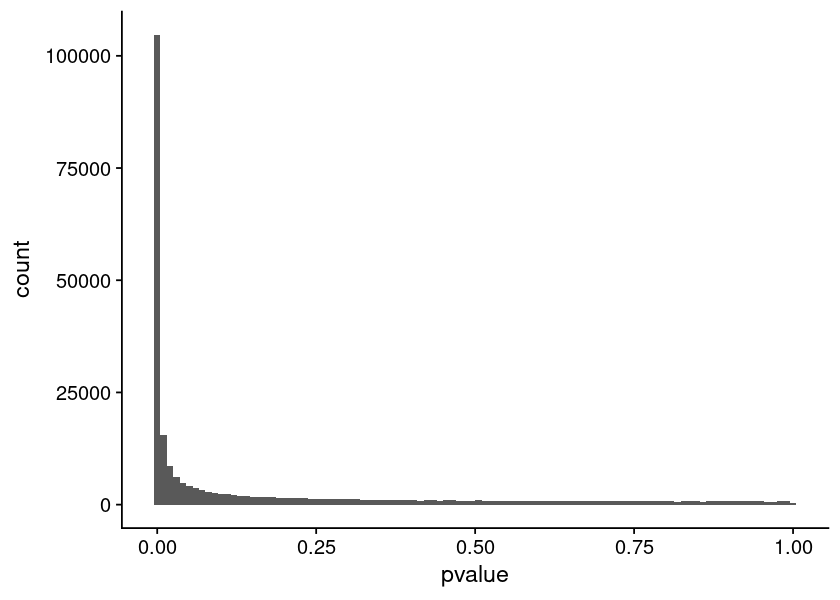

In [9]:
dat = dat_res
gpt = ggplot(dat, aes(x=pvalue)) + geom_histogram(bins = 100) + theme_cowplot()
options(repr.plot.width=7, repr.plot.height=5)
print(gpt)

Warning message:
“Removed 668 rows containing non-finite outside the scale range
(`stat_bin()`).”


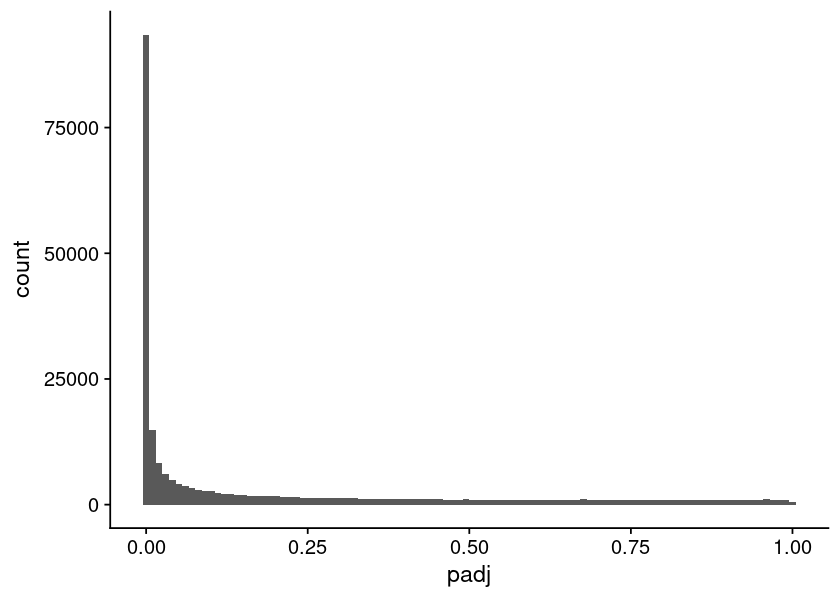

In [10]:
dat = dat_res
gpt = ggplot(dat, aes(x=padj)) + geom_histogram(bins = 100) + theme_cowplot()
options(repr.plot.width=7, repr.plot.height=5)
print(gpt)

In [11]:
dat = dat_res
dat = dat %>% 
    dplyr::filter(is.na(padj))
head(dat)

,Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr11_KI270721v1_random:14450-14823,0,NA,NA,NA,NA,NA
2,chr11_KI270721v1_random:34135-34494,0,NA,NA,NA,NA,NA
3,chr11_KI270721v1_random:38811-39152,0,NA,NA,NA,NA,NA
4,chr11_KI270721v1_random:43797-44496,0,NA,NA,NA,NA,NA
5,chr11_KI270721v1_random:45002-45312,0,NA,NA,NA,NA,NA
6,chr11_KI270721v1_random:47116-47678,0,NA,NA,NA,NA,NA


In [12]:
dat = dat_res
dat = dat %>% 
    dplyr::filter(is.na(padj)) %>% 
    tidyr::separate(Peak, c("Chrom", "Start", "End"), sep = ":|-", remove = FALSE)
CHROM = paste0("chr", 1:22)

dat %>% dplyr::filter(Chrom %in% CHROM)

Peak,Chrom,Start,End,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [35]:
lst = lst_data
dat = lst$data_cnt
head(dat)

,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10015-10442,155,214,257,236,185,214,7,12,4,11
chr1:14253-14645,110,144,160,141,130,130,8,26,30,57
chr1:16015-16477,141,208,206,190,202,182,9,9,18,23
chr1:17237-17772,259,350,399,367,369,331,7,13,23,59
chr1:28903-29613,263,338,368,333,352,317,12,18,3,32
chr1:30803-31072,82,115,171,136,105,115,13,22,14,33


In [30]:
vec = apply(dat, 1, sum)
sum(vec == 0)

[1] 668

Warning message:
“Removed 151392 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale
range (`geom_bar()`).”


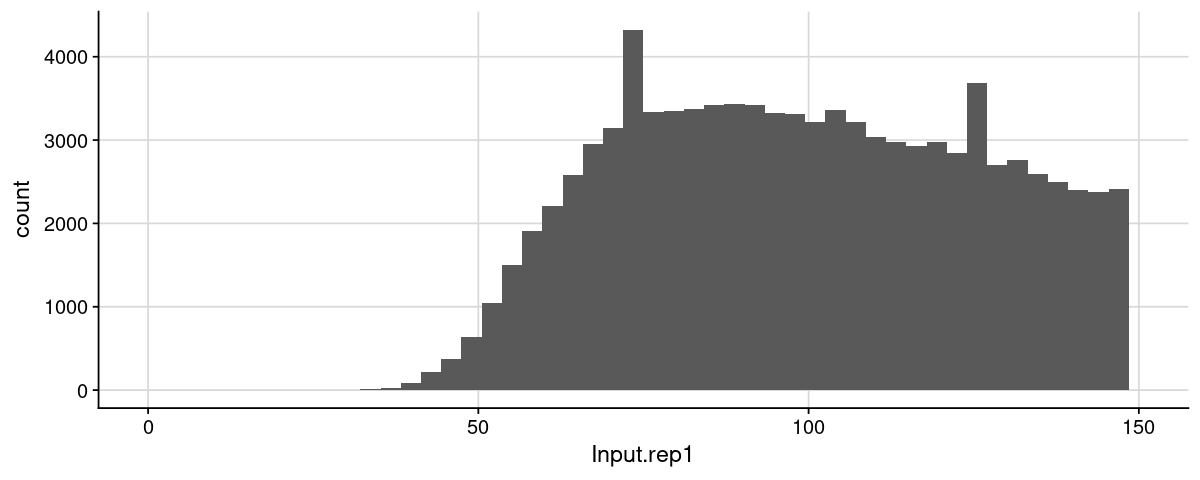

In [38]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Input.rep1)) +
    geom_histogram(bins = 50) +
    xlim(0, 150) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 10, repr.plot.height = 4)
print(gpt)

Warning message:
“Removed 2904 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale
range (`geom_bar()`).”


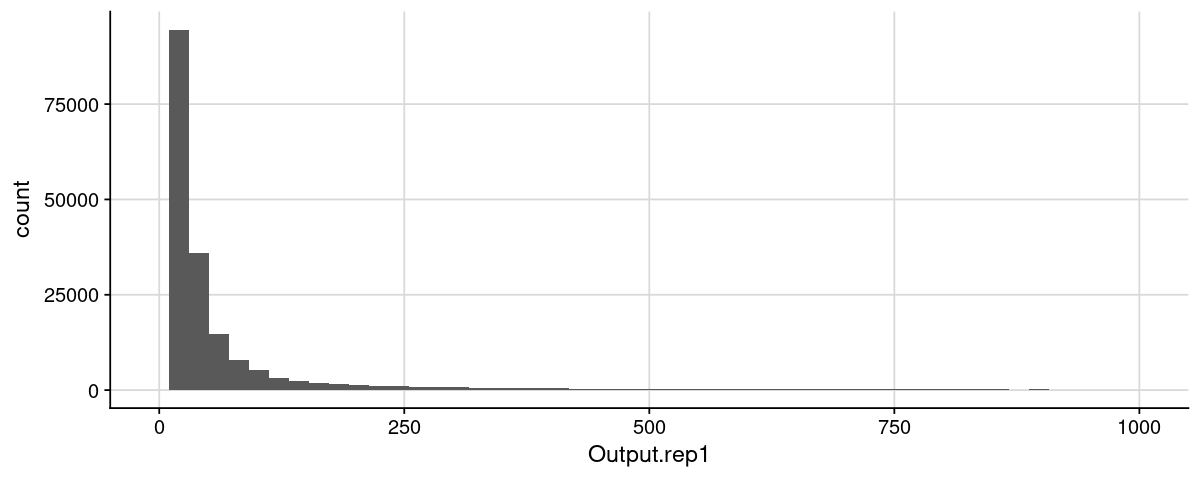

In [42]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Output.rep1)) +
    geom_histogram(bins = 50) +
    xlim(0, 1000) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 10, repr.plot.height = 4)
print(gpt)

In [37]:
vec = tmp$Input.rep1
summary(vec)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     112     193     531     392   38714 

Warning message:
“Removed 106825 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale
range (`geom_bar()`).”


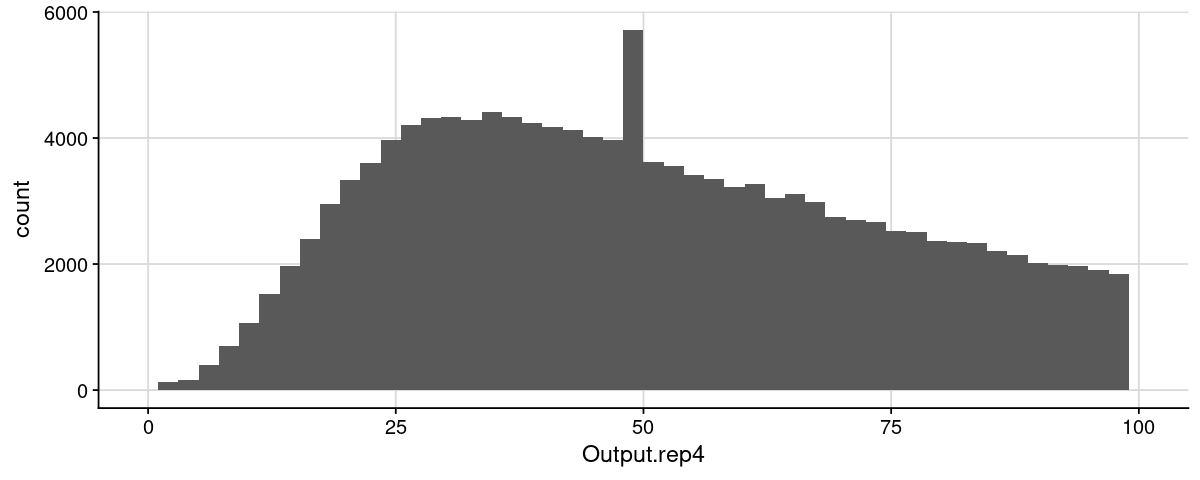

In [44]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Output.rep4)) +
    geom_histogram(bins = 50) +
    xlim(0, 100) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 10, repr.plot.height = 4)
print(gpt)

In [55]:
dds = dds_data
dat = counts(dds, normalized=TRUE)
head(dat)

,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
chr1:10015-10442,93.63817,99.57038,110.74173,108.73995,87.59836,113.18323,39.82845,32.68670,11.618583,16.43199
chr1:14253-14645,66.45290,67.00063,68.94427,64.96751,61.55561,68.75616,45.51823,70.82119,87.139370,85.14759
chr1:16015-16477,85.18053,96.77869,88.76575,87.54487,95.64794,96.25863,51.20801,24.51503,52.283622,34.35780
chr1:17237-17772,156.46637,162.84876,171.92977,169.09984,174.72322,175.06377,39.82845,35.41059,66.806851,88.13522
chr1:28903-29613,158.88284,157.26537,158.57182,153.43391,166.67364,167.65926,68.27734,49.03005,8.713937,47.80216
chr1:30803-31072,49.53761,53.50745,73.68419,62.66370,49.71799,60.82276,73.96712,59.92562,40.665040,49.29597


Warning message:
“Removed 97670 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale
range (`geom_bar()`).”


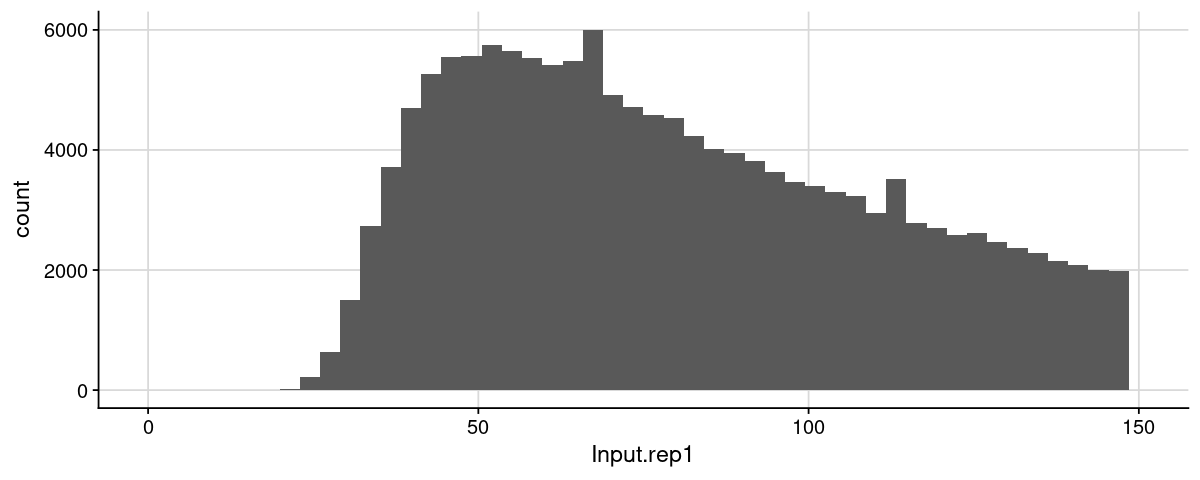

In [56]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Input.rep1)) +
    geom_histogram(bins = 50) +
    xlim(0, 150) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 10, repr.plot.height = 4)
print(gpt)

Warning message:
“Removed 19219 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale
range (`geom_bar()`).”


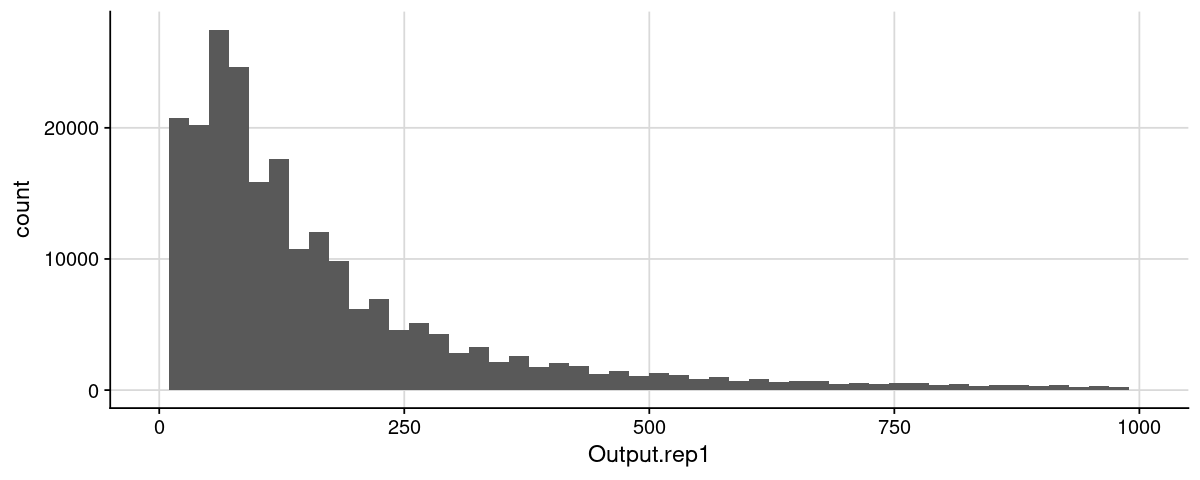

In [59]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Output.rep1)) +
    geom_histogram(bins = 50) +
    xlim(0, 1000) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 10, repr.plot.height = 4)
print(gpt)

Warning message:
“Removed 20577 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale
range (`geom_bar()`).”


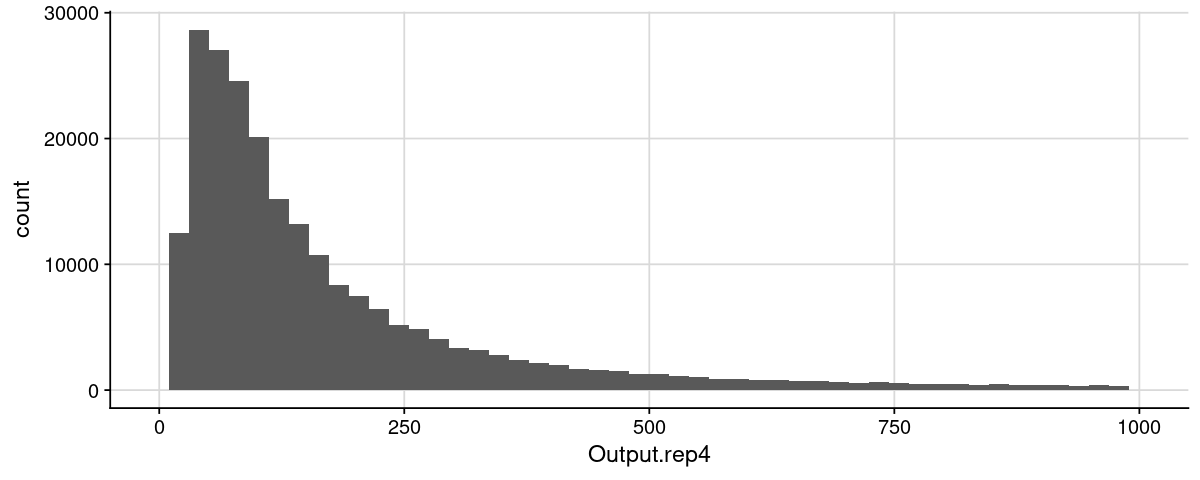

In [60]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Output.rep4)) +
    geom_histogram(bins = 50) +
    xlim(0, 1000) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 10, repr.plot.height = 4)
print(gpt)

In [22]:
dds = dds_data
dat = counts(dds, normalized=TRUE)
dat = dat %>% 
    as.data.frame() %>%
    rownames_to_column("Peak") %>%
    tidyr::separate(Peak, c("Chrom", "Start", "End"), sep = ":|-", remove = FALSE)
head(dat)

,Peak,Chrom,Start,End,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1:10015-10442,chr1,10015,10442,93.63817,99.57038,110.74173,108.73995,87.59836,113.18323,39.82845,32.68670,11.618583,16.43199
2,chr1:14253-14645,chr1,14253,14645,66.45290,67.00063,68.94427,64.96751,61.55561,68.75616,45.51823,70.82119,87.139370,85.14759
3,chr1:16015-16477,chr1,16015,16477,85.18053,96.77869,88.76575,87.54487,95.64794,96.25863,51.20801,24.51503,52.283622,34.35780
4,chr1:17237-17772,chr1,17237,17772,156.46637,162.84876,171.92977,169.09984,174.72322,175.06377,39.82845,35.41059,66.806851,88.13522
5,chr1:28903-29613,chr1,28903,29613,158.88284,157.26537,158.57182,153.43391,166.67364,167.65926,68.27734,49.03005,8.713937,47.80216
6,chr1:30803-31072,chr1,30803,31072,49.53761,53.50745,73.68419,62.66370,49.71799,60.82276,73.96712,59.92562,40.665040,49.29597


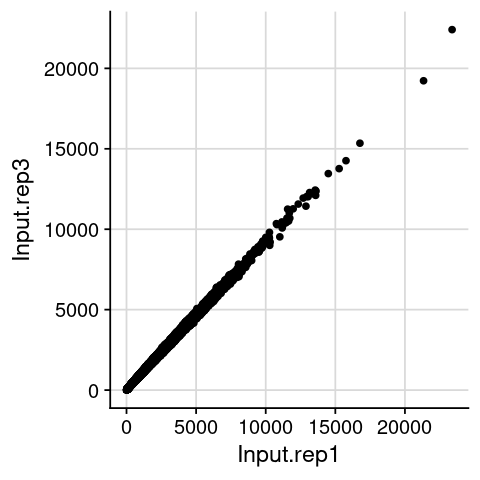

In [19]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Input.rep1, y = Input.rep3)) +
    geom_point() +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 4, repr.plot.height = 4)
print(gpt)

In [23]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Input.rep1, y = Input.rep4)) +
    geom_point() +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 4, repr.plot.height = 4)
print(gpt)

ERROR: Error in FUN(newX[, i], ...): invalid 'type' (character) of argument


In [24]:
head(idx)

chr1:10015-10442 chr1:14253-14645 chr1:16015-16477 chr1:17237-17772 
           FALSE            FALSE            FALSE            FALSE 
chr1:28903-29613 chr1:30803-31072 
           FALSE            FALSE

In [ ]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Input.rep1, y = Input.rep3)) +
    geom_point() +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 4, repr.plot.height = 4)
print(gpt)

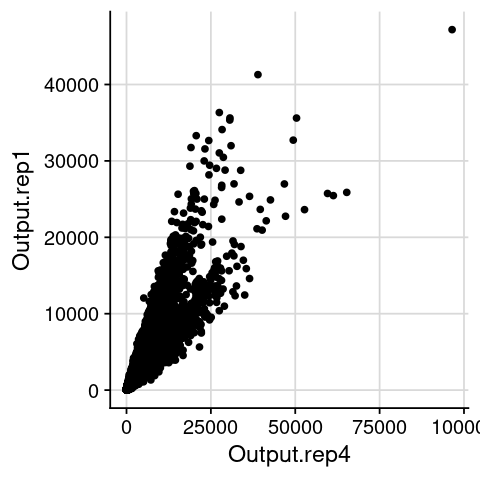

In [65]:
vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Output.rep4, y = Output.rep2)) +
    geom_point() +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 4, repr.plot.height = 4)
print(gpt)

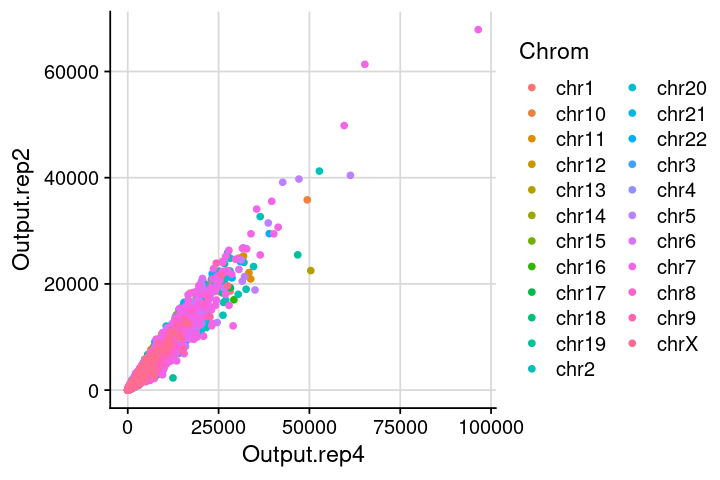

In [27]:
#vec = apply(dat, 1, sum)
#idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Output.rep4, y = Output.rep2, color = Chrom)) +
    geom_point() +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 6, repr.plot.height = 4)
print(gpt)

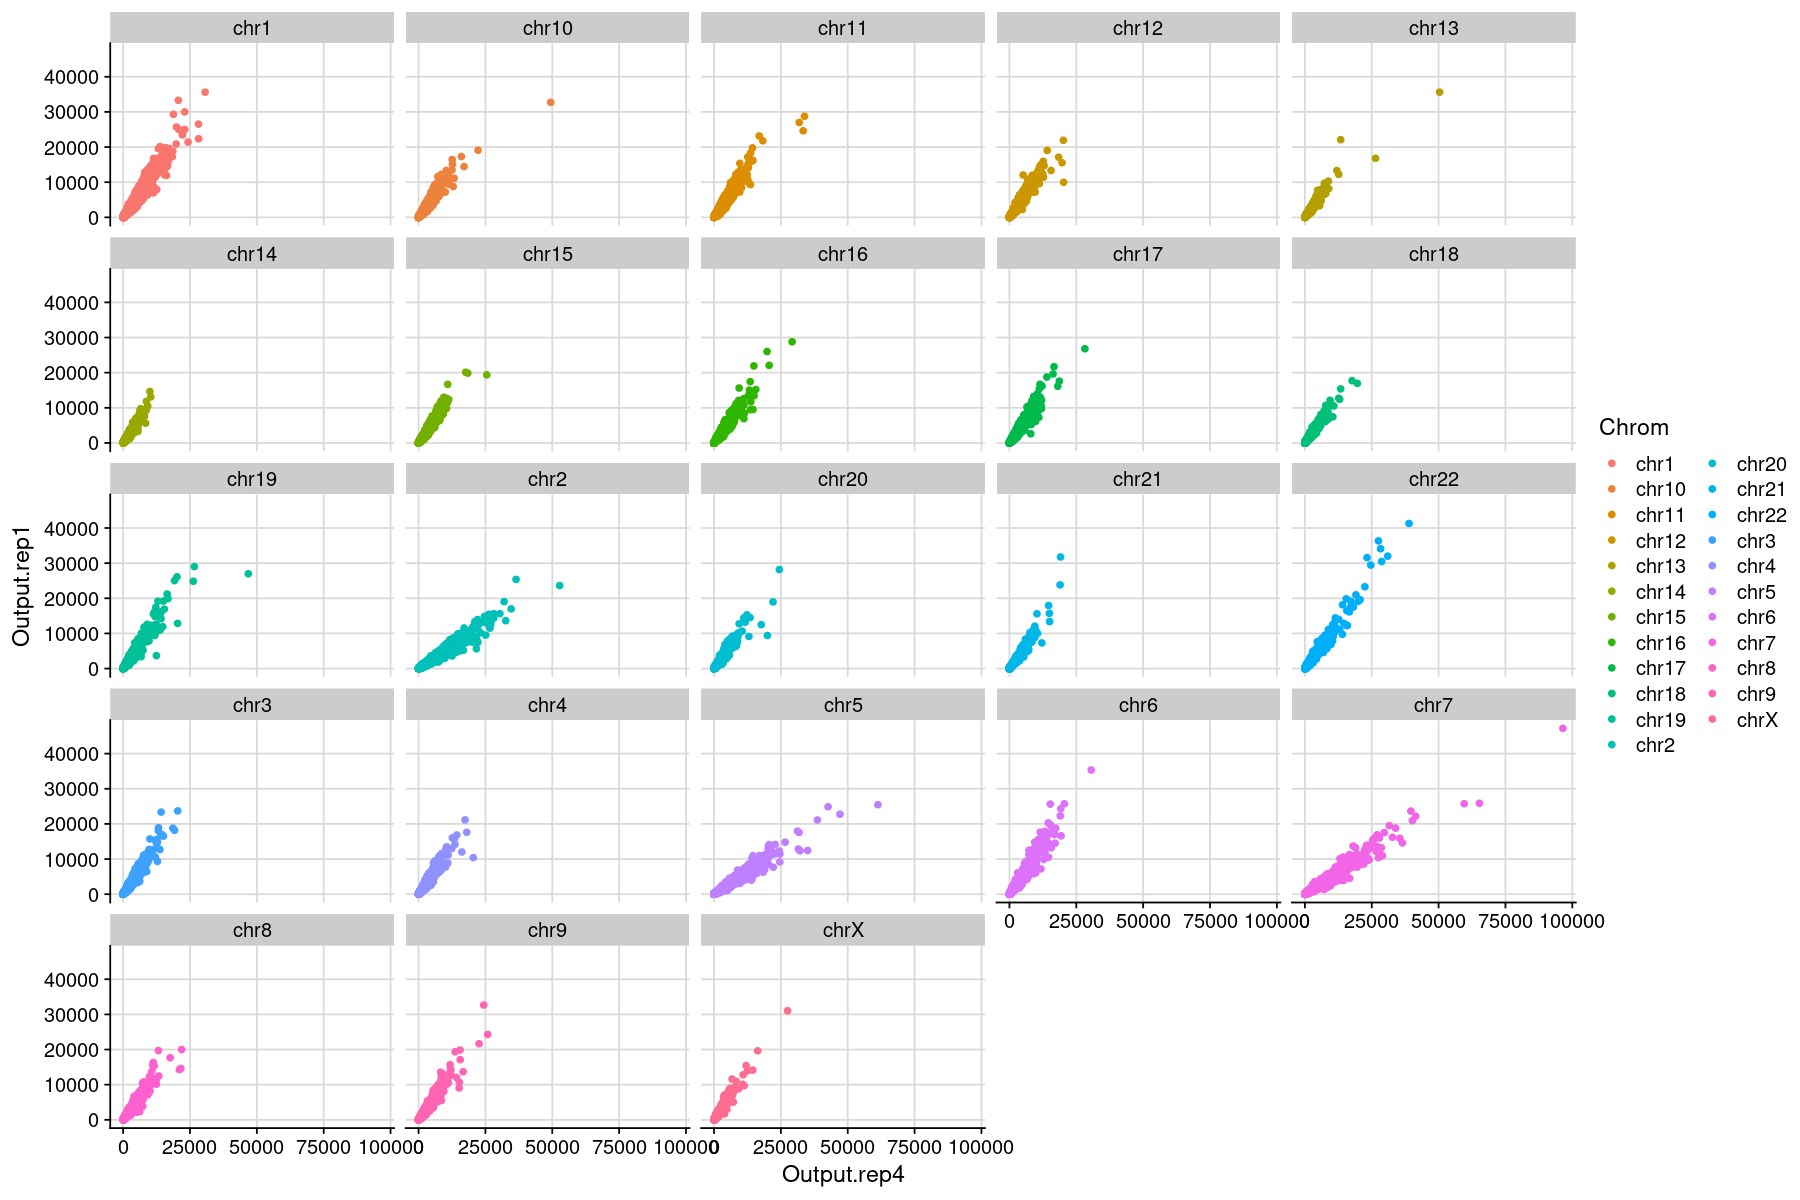

In [30]:
#vec = apply(dat, 1, sum)
#idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Output.rep4, y = Output.rep1, color = Chrom)) +
    geom_point() +
    theme_cowplot() +
    background_grid() +
    facet_wrap(~Chrom)

options(repr.plot.width = 15, repr.plot.height = 10)
print(gpt)

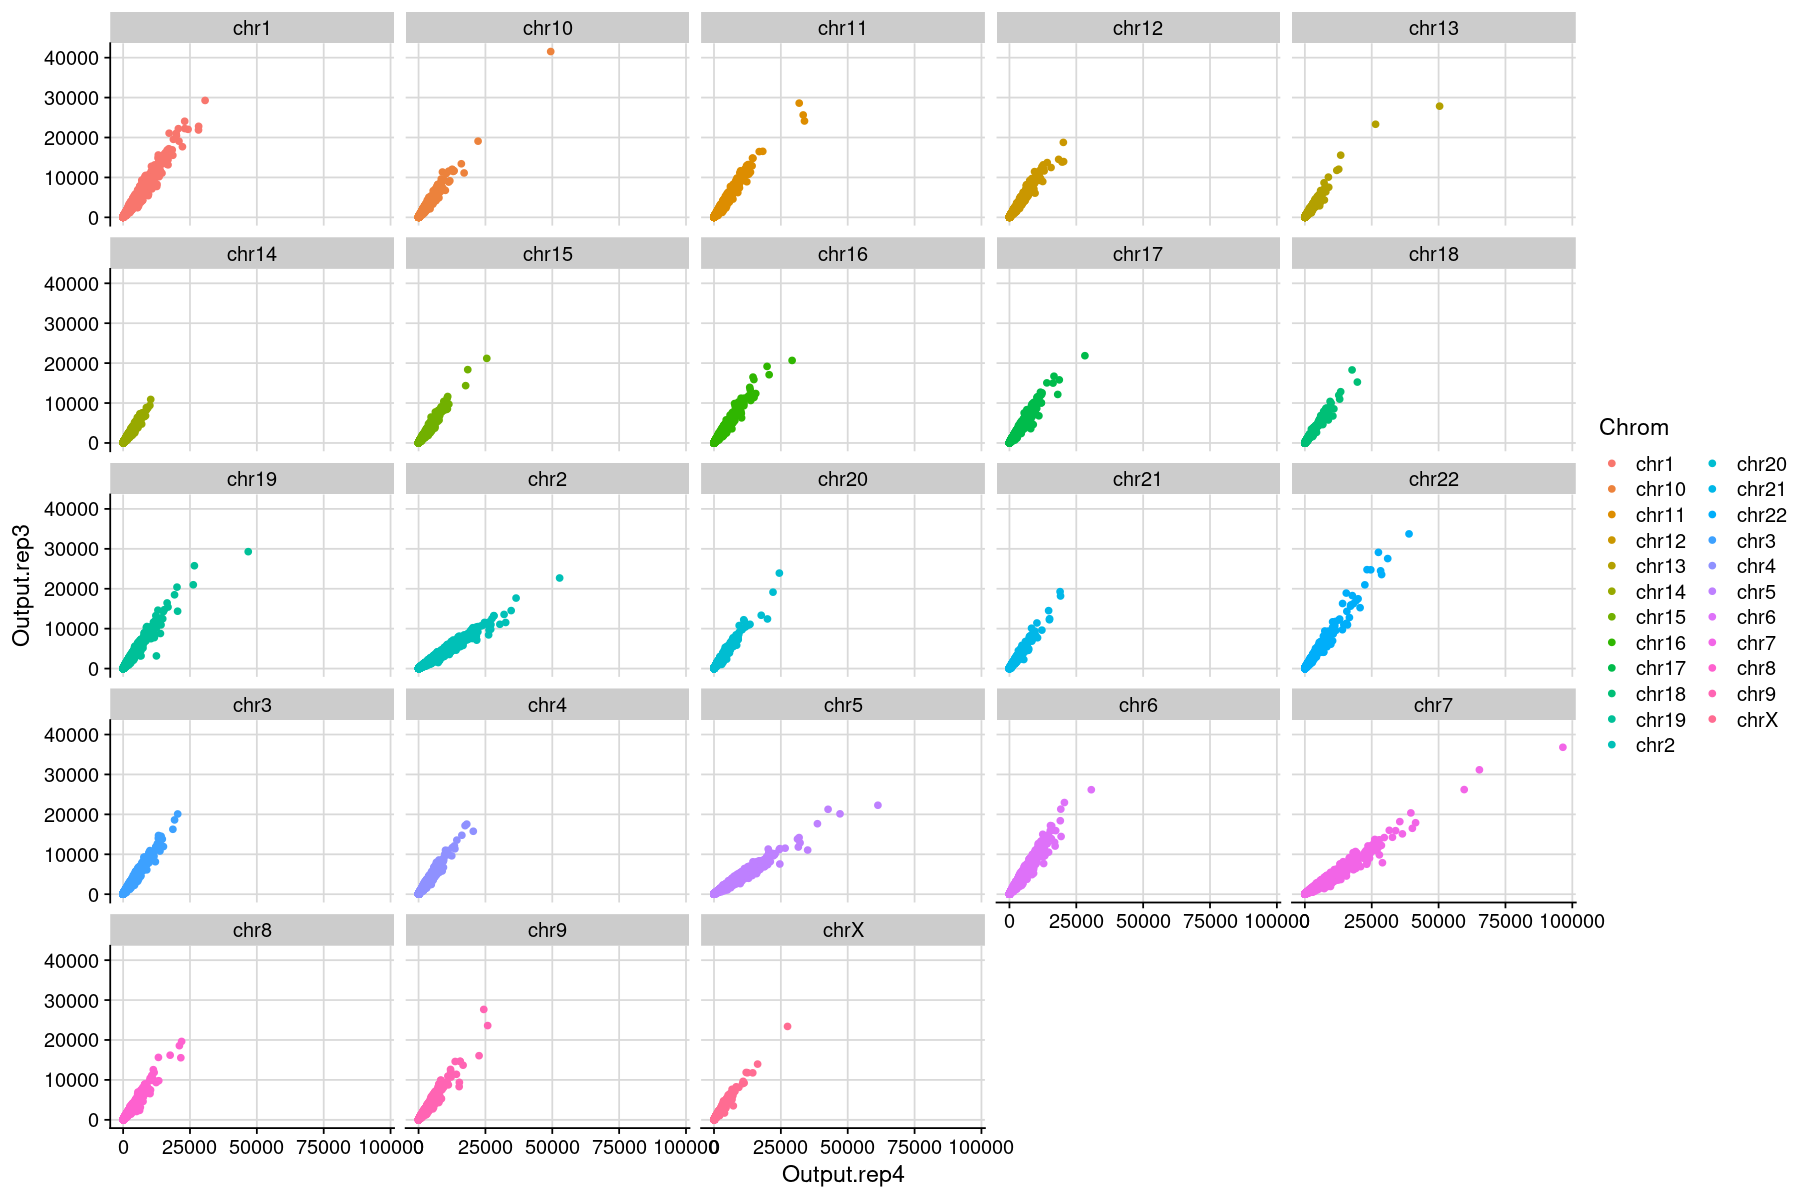

In [31]:
#vec = apply(dat, 1, sum)
#idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Output.rep4, y = Output.rep3, color = Chrom)) +
    geom_point() +
    theme_cowplot() +
    background_grid() +
    facet_wrap(~Chrom)

options(repr.plot.width = 15, repr.plot.height = 10)
print(gpt)

In [32]:
library(edgeR)

Loading required package: limma


Attaching package: ‘limma’


The following object is masked from ‘package:DESeq2’:

    plotMA


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [33]:
DGEList

function (counts, ...) 
UseMethod("DGEList")
<bytecode: 0x55c7fe2f2098>
<environment: namespace:edgeR>

In [40]:
lst = lst_data
dat_cnt = lst$data_cnt
dat_col = lst$data_col

In [41]:
dim(dat_cnt)

[1] 247520     10

In [42]:
dat_col

,condition
,<chr>
Input.rep1,Input
Input.rep2,Input
Input.rep3,Input
Input.rep4,Input
Input.rep5,Input
Input.rep6,Input
Output.rep1,Output
Output.rep2,Output
Output.rep3,Output


In [43]:
# edgeR TMM normalize
y <- DGEList(counts = dat_cnt, group = dat_col$condition)
conditions = dat_col$condition

In [44]:
## Remove rows conssitently have zero or very low counts
keep <- filterByExpr(y)
y <- y[keep, keep.lib.sizes = FALSE]

## Perform TMM normalization and convert to CPM (Counts Per Million)
y <- calcNormFactors(y, method = "TMM")
count_norm <- cpm(y)
count_norm <- as.data.frame(count_norm)

In [45]:
head(count_norm)

,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10015-10442,1.0715432,1.1470488,1.2782299,1.2538291,1.0090829,1.3000161,0.4471249,0.3703189,0.13251675,0.1869640
chr1:14253-14645,0.7604500,0.7718459,0.7957851,0.7491098,0.7090852,0.7897294,0.5109999,0.8023577,0.99387560,0.9688136
chr1:16015-16477,0.9747587,1.1148886,1.0245734,1.0094387,1.1018094,1.1056212,0.5748749,0.2777392,0.59632536,0.3909248
chr1:17237-17772,1.7905141,1.8760144,1.9844892,1.9498105,2.0127112,2.0107726,0.4471249,0.4011788,0.76197129,1.0028070
chr1:28903-29613,1.8181669,1.8116939,1.8303058,1.7691741,1.9199847,1.9257248,0.7664999,0.5554784,0.09938756,0.5438953
chr1:30803-31072,0.5668809,0.6164047,0.8504954,0.7225456,0.5727227,0.6986068,0.8303749,0.6789180,0.46380861,0.5608921


In [ ]:
dat = count_norm

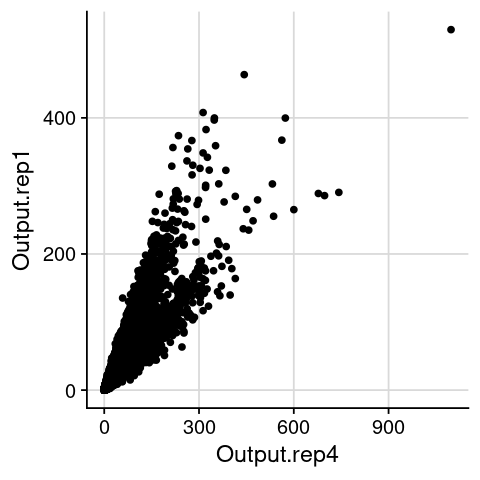

In [47]:
dat = count_norm

vec = apply(dat, 1, sum)
idx = vec == 0
tmp = dat[!idx,]

gpt = ggplot(tmp, aes(x=Output.rep4, y = Output.rep1)) +
    geom_point() +
    theme_cowplot() +
    background_grid()

options(repr.plot.width = 4, repr.plot.height = 4)
print(gpt)

In [33]:
# Run the Wilcoxon rank-sum test for each gene
pvalues <- sapply(
    1:nrow(count_norm), 
    function(i){
        data <- cbind.data.frame(gene = as.numeric(t(count_norm[i,])), conditions)
        p <- wilcox.test(gene~conditions, data)$p.value
        return(p)
})

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = DATA[[1L]], y

In [34]:
vec = pvalues
length(vec)

[1] 246850

In [35]:
sum(is.na(vec))

[1] 0

In [36]:
head(vec)

[1] 0.00952381 0.25714286 0.00952381 0.00952381 0.00952381 0.47619048

In [40]:
dat = data.frame(pvalue = vec)
head(dat)

,pvalue
,<dbl>
1,0.00952381
2,0.25714286
3,0.00952381
4,0.00952381
5,0.00952381
6,0.47619048


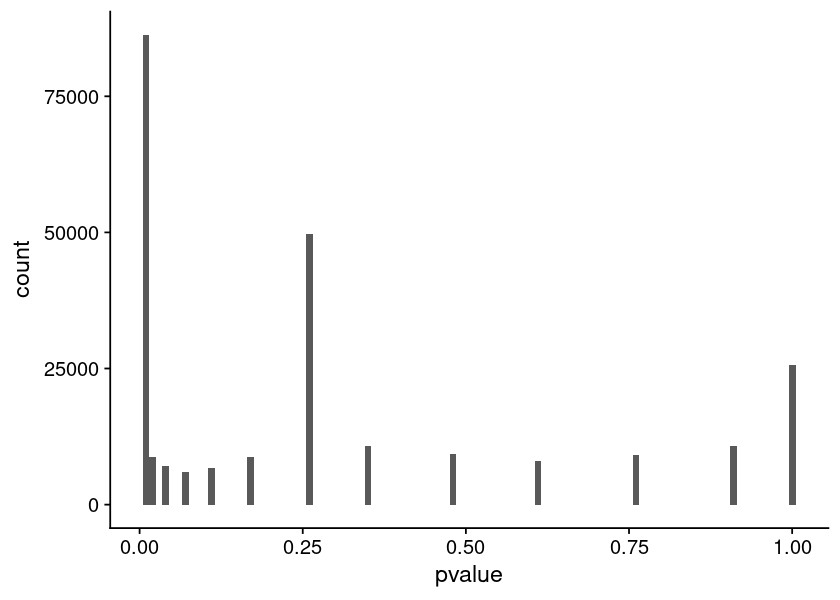

In [41]:
gpt = ggplot(dat, aes(x=pvalue)) + geom_histogram(bins = 100) + theme_cowplot()
options(repr.plot.width=7, repr.plot.height=5)
print(gpt)

In [42]:
dat = dat_res
vec1 = dat$pvalue
#vec2 = dat$padj

#vec = vec2
#cat("#{Total}   =", nrow(dat), "\n")
#cat("#{Removed} =", sum( is.na(vec)), "\n")
#cat("%{Removed} =", mean(is.na(vec)), "\n")

vec = vec1
cat("#{Signif (<0.05) | Before removed} =", sum( vec < 0.05, na.rm = TRUE), "\n")
cat("%{Signif (<0.05) | Before removed} =", mean(vec < 0.05, na.rm = TRUE), "\n") 

#vec = vec2
#cat("#{Signif (<0.05) | After removed}  =", sum( vec < 0.05, na.rm = TRUE), "\n")
#cat("%{Signif (<0.05) | After removed}  =", mean(vec < 0.05, na.rm = TRUE), "\n") 

#{Signif (<0.05) | Before removed} = 141618 
%{Signif (<0.05) | Before removed} = 0.573696 
